<a href="https://colab.research.google.com/github/nupur710/Machine-Learning-in-Python/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install scipy
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install quandl

In [2]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression

In [3]:
df= quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [4]:
df= df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [5]:
print(df.head())

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume
Date                                                                
2004-08-19  50.159839  52.191109  48.128568   50.322842   44659000.0
2004-08-20  50.661387  54.708881  50.405597   54.322689   22834300.0
2004-08-23  55.551482  56.915693  54.693835   54.869377   18256100.0
2004-08-24  55.792225  55.972783  51.945350   52.597363   15247300.0
2004-08-25  52.542193  54.167209  52.100830   53.164113    9188600.0


In [6]:
df['High PCT']= (df['Adj. High'] - df['Adj. Low'])/df['Adj. Low'] * 100.0

In [7]:
df['PCT Change']= (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'] * 100.0

In [8]:
#features
df=  df[['Adj. Close', 'High PCT', 'PCT Change', 'Adj. Volume']]

In [9]:
print(df.head())

            Adj. Close  High PCT  PCT Change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0


In [10]:
df

,Adj. Close,High PCT,PCT Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0
...,...,...,...,...
2018-03-21,1094.000000,1.976619,0.130884,1990515.0
2018-03-22,1053.150000,3.265882,-2.487014,3418154.0
2018-03-23,1026.550000,4.089299,-2.360729,2413517.0


In [11]:
df.shape

(3424, 4)

In [12]:
df.fillna(value= 9999, inplace= True)

In [13]:
#label
forecast_col= 'Adj. Close'

In [14]:
#predict out 10% of dataset
forecast_out = math.ceil(0.01 * len(df)) #shift each Adj. Close by 35 rows
forecast_out

35

In [15]:
df

,Adj. Close,High PCT,PCT Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0
...,...,...,...,...
2018-03-21,1094.000000,1.976619,0.130884,1990515.0
2018-03-22,1053.150000,3.265882,-2.487014,3418154.0
2018-03-23,1026.550000,4.089299,-2.360729,2413517.0


In [16]:
#shifting so that the label column for each row is the prediction of Adj_Close forecast_out days in the future
df['label']= df[forecast_col].shift(-forecast_out)

In [17]:
df

,Adj. Close,High PCT,PCT Change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-03-21,1094.000000,1.976619,0.130884,1990515.0,NaN
2018-03-22,1053.150000,3.265882,-2.487014,3418154.0,NaN
2018-03-23,1026.550000,4.089299,-2.360729,2413517.0,NaN


In [18]:
df.dropna(inplace=True)
df

,Adj. Close,High PCT,PCT Change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-01-30,1177.370000,1.142604,-0.029718,1792602.0,1094.000000
2018-01-31,1182.220000,1.213207,-0.134312,1643877.0,1053.150000
2018-02-01,1181.590000,1.547000,0.476195,2774967.0,1026.550000


In [19]:
X = np.array(df.drop('label', axis=1))
y= np.array(df['label'])

In [20]:
print(X)

[[ 5.03228418e+01  8.44101709e+00  3.24967503e-01  4.46590000e+07]
 [ 5.43226889e+01  8.53731343e+00  7.22700723e+00  2.28343000e+07]
 [ 5.48693765e+01  4.06235672e+00 -1.22788010e+00  1.82561000e+07]
 ...
 [ 1.18159000e+03  1.54700007e+00  4.76194525e-01  2.77496700e+06]
 [ 1.11920000e+03  1.81160398e+00 -7.29098295e-01  5.79888000e+06]
 [ 1.06876000e+03  5.51223574e+00 -2.89384977e+00  3.74246900e+06]]


In [21]:
print(y)

[  69.0782379    67.83941377   68.91272699 ... 1026.55       1054.09
 1006.94      ]


In [22]:
#features in ml in range -1 to 1, speeds up processing
X= preprocessing.scale(X)

In [23]:
#train-test split
X_train, X_test, y_train, y_test= model_selection.train_test_split(X, y, test_size= 0.2)

In [24]:
#classifier- support vector regression
clf= svm.SVR()

In [25]:
#train-- fit train features with labels
clf.fit(X_train, y_train)

SVR()

In [26]:
#test on test features and labels
confidence= clf.score(X_test, y_test)

In [27]:
print(confidence)

0.8084415119383663


In [28]:
#linear regression is a multi-threaded algo
clf= LinearRegression(n_jobs= 1)

In [29]:
clf.fit(X_train, y_train)
confidence= clf.score(X_test, y_test)
print(confidence)

0.9774965444591619


In [30]:
#confidence score with different kernels
for k in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf= svm.SVR(kernel= k)
  clf.fit(X_train, y_train)
  confidence= clf.score(X_test, y_test)
  print(k, confidence)

linear 0.9761447808851251
poly 0.6445641420887437
rbf 0.8084415119383663
sigmoid 0.8981516880849668


In [31]:
#linear regression classifier performs best
clf= LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [32]:
X_lately= X[-forecast_out:]
X_lately

array([[ 2.62836772, -0.59956908,  0.14019752, -0.76716771],
       [ 2.68662975, -0.49578494,  0.53097279, -0.57983089],
       [ 2.7391177 , -0.44345756,  0.55095625, -0.77306097],
       [ 2.7178258 , -0.66503151, -0.18488046, -0.79662122],
       [ 2.692885  , -0.66674208, -0.43982364, -0.77955849],
       [ 2.68201851, -0.9319226 , -0.26703183, -0.80592231],
       [ 2.67403906, -1.2177309 , -0.05623854, -0.84827073],
       [ 2.66196963, -0.81591766, -0.15944615, -0.84176825],
       [ 2.63931441, -0.83723508, -0.38581877, -0.82809679],
       [ 2.62227286, -0.73149768, -0.38117269, -0.83358049],
       [ 2.61204794, -1.13087984, -0.11732681, -0.81253132],
       [ 2.69148158,  0.02114238,  1.29540984, -0.76422869],
       [ 2.76490055, -0.02603164,  1.10879082, -0.76485942],
       [ 2.78190199, -0.86275107, -0.06604773, -0.7964564 ],
       [ 2.84016402, -0.74442688,  0.42889739, -0.77177666],
       [ 2.85588234, -0.91248177,  0.20787616, -0.81342602],
       [ 2.85018846, -0.

In [34]:
confidence= clf.score(X_test, y_test)
print(confidence)

0.9774965444591619


In [35]:
forecast_set= clf.predict(X_lately)

In [36]:
print(forecast_set, confidence, forecast_out)

[1077.25530226 1091.18563646 1104.91633817 1099.90598162 1093.55045373
 1091.36006213 1089.98538334 1086.25766268 1080.52348649 1076.08361091
 1074.13498914 1092.24641217 1110.76048575 1116.35524124 1130.79501326
 1135.12682984 1133.44231278 1131.1018324  1132.84505034 1150.09810559
 1150.11128425 1159.47671474 1156.25322011 1164.37475809 1183.9537186
 1197.18561202 1191.31765298 1203.16191768 1207.77028873 1207.40208566
 1198.16576607 1203.02382177 1201.62761846 1137.15778436 1082.7321944 ] 0.9774965444591619 35


In [37]:
#plot
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [38]:
style.use("ggplot")

In [40]:
#add forecast column
df['Forecast']= np.nan

In [41]:
#predict starting next day
last_date= df.iloc[-1].name
last_unix= last_date.timestamp()
one_day= 86400
next_unix= last_unix + one_day

In [42]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

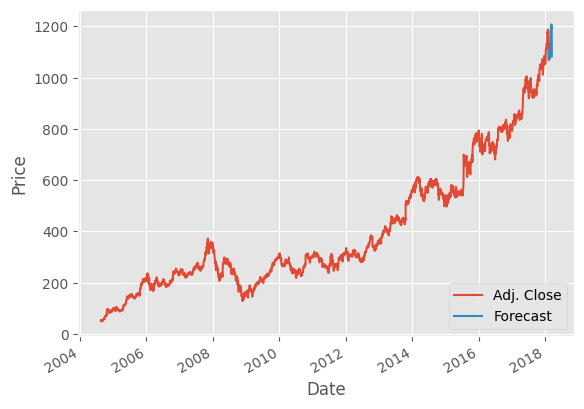

In [43]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()